In [26]:
import torch
import numpy as np
import os
import seaborn as sns
import matplotlib as plt

In [8]:
loaded_tensor = torch.load('activations/act0.pt')
numpytensor = loaded_tensor.cpu().numpy()
print(numpytensor)
numpytensor.shape

[[[-30.304483 -29.79004  -30.458542 ... -37.878197 -37.362724 -27.951534]]]


(1, 1, 50257)

In [10]:
vec = numpytensor[0,0,:]
vec

array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
       -27.951534], dtype=float32)

In [12]:
vec = []
for i in range(10):
    loaded_tensor = torch.load('activations/act0.pt')
    numpytensor = loaded_tensor.cpu().numpy()
    vec.append(numpytensor[0,0,:])
    
vec

[array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
        -27.951534], dtype=float32),
 array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
        -27.951534], dtype=float32),
 array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
        -27.951534], dtype=float32),
 array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
        -27.951534], dtype=float32),
 array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
        -27.951534], dtype=float32),
 array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
        -27.951534], dtype=float32),
 array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
        -27.951534], dtype=float32),
 array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
        -27.951534], dtype=float32),
 array([-30.304483, -29.79004 , -30.458542, ..., -37.878197, -37.362724,
        -27.951534], dtype=float32),
 array([-3

In [56]:
directory_path = 'activations'

# Create an empty list to store file names
files_list = []

# List all files in the specified path and add them to the list
for entry in os.listdir(directory_path):
    full_path = os.path.join(directory_path, entry)
    if os.path.isfile(full_path):
        files_list.append(entry)

files_list.sort()
files_list

['act6_0.pt',
 'act6_1.pt',
 'act6_2.pt',
 'act6_3.pt',
 'act6_4.pt',
 'act6_5.pt',
 'act6_6.pt',
 'act6_7.pt',
 'act6_8.pt',
 'act6_9.pt',
 'act7_0.pt',
 'act7_1.pt',
 'act7_2.pt',
 'act7_3.pt',
 'act7_4.pt',
 'act7_5.pt',
 'act7_6.pt',
 'act7_7.pt',
 'act7_8.pt',
 'act7_9.pt',
 'act8_0.pt',
 'act8_1.pt',
 'act8_2.pt',
 'act8_3.pt',
 'act8_4.pt',
 'act8_5.pt',
 'act8_6.pt',
 'act8_7.pt',
 'act8_8.pt',
 'act8_9.pt',
 'act9_0.pt',
 'act9_1.pt',
 'act9_2.pt',
 'act9_3.pt',
 'act9_4.pt',
 'act9_5.pt',
 'act9_6.pt',
 'act9_7.pt',
 'act9_8.pt',
 'act9_9.pt']

In [58]:
vec = []
label = []
for name in files_list:
    loaded_tensor = torch.load('activations/'+name)
    numpytensor = loaded_tensor.cpu().numpy()
    vec.append(numpytensor[0,0,:])
    label.append(int(name[3]))
    
matrix = np.vstack(vec)
matrix.shape

(40, 50257)

In [59]:
def heat_act(matrix):


    # Create a heatmap
    sns.heatmap(matrix, annot=False, cmap='viridis')
 


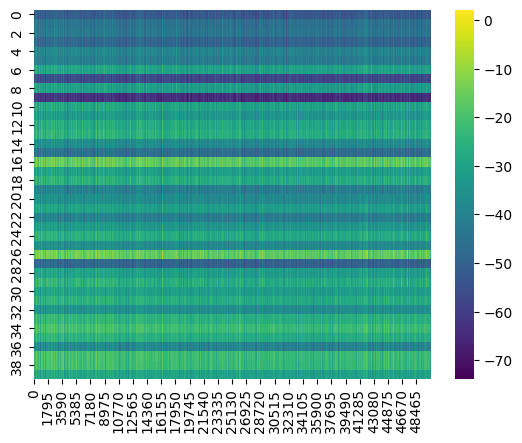

In [60]:
heat_act(matrix)

In [62]:
norm_matrix = matrix / np.linalg.norm(matrix, axis=1, keepdims=True)

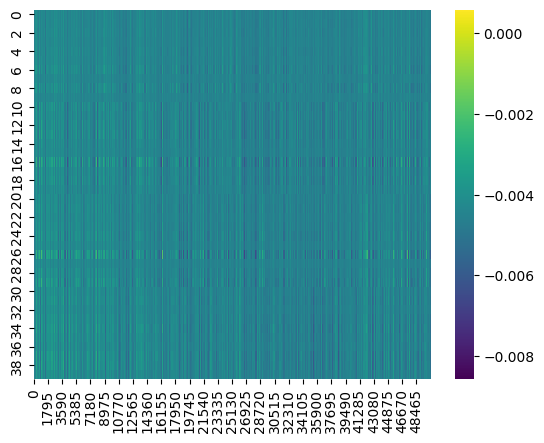

In [63]:
heat_act(norm_matrix)

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], ...])  # Replace with your data
X = matrix
y = np.array(label)  # Replace with your data

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients:', model.coef_)
# The mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))
# The intercept
print('Intercept:', model.intercept_)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Coefficients: [-4.4675352e-04 -7.0129921e-05  7.1624629e-05 ... -6.4134047e-06
 -1.4049317e-05 -2.5744466e-05]
Mean squared error: 0.013317343954525995
Intercept: 8.319172
R^2 Score: 0.9818657444023475


In [85]:
#X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], ...])  # Replace with your data
X = matrix[:, :100]
y = np.array(label)  # Replace with your data

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

# The coefficients
print('Coefficients:', model.coef_)
# The mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))
# The intercept
print('Intercept:', model.intercept_)

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

[6.8557215 7.063093  6.8628144 8.221972  5.885754  7.0772705 8.855273
 7.84921  ]
[7 7 7 8 6 7 9 8]
Coefficients: [ 0.01457151 -0.02553574 -0.01605569  0.00013964 -0.02088807  0.01775937
  0.00031795  0.00769405 -0.03208207 -0.01479574 -0.00624345 -0.00626358
  0.00191355  0.00734023 -0.01565089  0.0031519   0.02709208  0.00307369
 -0.00265836 -0.00754587 -0.02022254 -0.07098307  0.02142359  0.03649777
  0.06155881 -0.01258646  0.01536528  0.02230954 -0.03849017 -0.01206463
  0.01395805  0.00122735 -0.00106575  0.01996941 -0.03172841 -0.04330638
 -0.01530762  0.04002379 -0.03114862  0.01801189  0.00363524  0.03138594
 -0.02016682  0.00916125  0.0323294  -0.04308603 -0.0004551   0.00066194
 -0.00409383  0.00575823 -0.00500064 -0.01390099  0.013719   -0.00174854
 -0.03043108  0.01201232  0.02887843 -0.00464228  0.02635602  0.00693974
 -0.01555467  0.0234795   0.02533806 -0.03367123  0.0338988   0.0040424
 -0.01301768 -0.00552602  0.00874108  0.03128205 -0.01435538  0.00887605
  0.0378373

50257


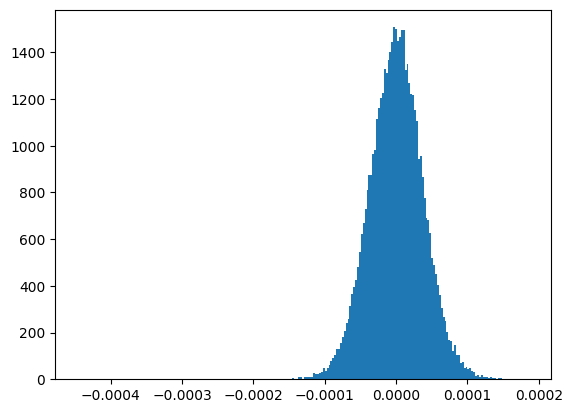

In [68]:
import matplotlib.pyplot as plt
 # Create the histogram
print(len(model.coef_,))
plt.hist(model.coef_, bins='auto')  # 'auto' lets Matplotlib decide the number of bins
# Show the plot
plt.show()

In [69]:
import statsmodels.api as sm
import pandas as pd

# Sample data - replace with your dataset
# Assume 'df' is a pandas DataFrame with your data, and 'target' is the target variable
X = pd.DataFrame(matrix)  # replace with your data
#target = '...'          # replace with the name of your target column

# Adding a constant column for the intercept
#X = df.drop(target, axis=1)
y = label
X = sm.add_constant(X)

# Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    cols = list(X.columns)
    while len(cols) > 0:
        p_values = sm.OLS(y, X[cols]).fit().pvalues.sort_values(ascending=False)
        max_p_value = p_values[0]
        feature_with_max_p_value = p_values.idxmax()

        if max_p_value > significance_level:
            cols.remove(feature_with_max_p_value)
        else:
            break

    return cols

optimal_columns = backward_elimination(X, y)
print("Optimal columns:", optimal_columns)


Optimal columns: ['const', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216

/var/folders/x_/jrkld_wd6rx480q5_s9z7x840000gn/T/ipykernel_27947/2382522188.py:20: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  feature_with_max_p_value = p_values.idxmax()


In [70]:
len(optimal_columns)

50258